# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*The Labeled Faces in the Wild face recognition dataset*

http://vis-www.cs.umass.edu/lfw/


### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
#libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set()

In [0]:
#import dataset
faces = fetch_lfw_people(min_faces_per_person=70)

In [0]:
#Features
print(faces.data)
faces.data.shape[1]


[[253.66667  254.33333  253.66667  ...  87.        88.        86.666664]
 [ 38.333332  43.        53.       ... 114.666664 116.666664 143.66667 ]
 [ 88.        92.666664 112.666664 ... 182.66667  183.66667  182.66667 ]
 ...
 [ 86.333336  83.333336  76.333336 ...  48.        49.        40.666668]
 [ 49.333332  55.666668  76.666664 ... 186.33333  176.33333  161.      ]
 [ 31.        26.333334  28.       ...  34.        42.        69.666664]]


2914

In [0]:
#Classes
print(faces.target_names)
faces.target_names.shape[0]

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


7

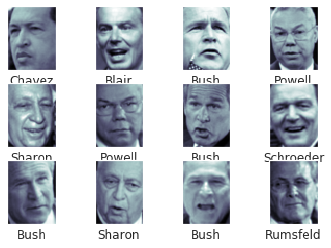

In [0]:
#Algumas das imagens que seram analizadas
fig, ax = plt.subplots(3,4)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]].split()[-1])


In [0]:
# separando o X e y de treino e test
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, test_size=0.25, random_state=42)

In [0]:
# normalizando os dados
scaler = MinMaxScaler()
Xtrain_minmax = scaler.fit_transform(Xtrain)
Xtest_minmax = scaler.transform(Xtest)

### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*SVM*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
#Definindo o classificador
clf = SVC(class_weight='balanced', C=10)

In [0]:
#train
clf.fit(Xtrain_minmax, ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

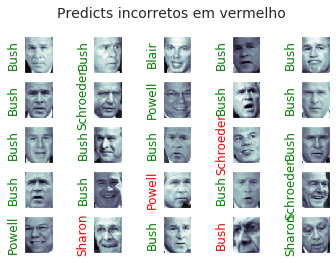

In [0]:
#predict
pred = clf.predict(Xtest_minmax)
# plotando os predicts
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicts incorretos em vermelho', size=14);


In [0]:
# metricas das classes
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.69      0.72        13
     Colin Powell       0.82      0.92      0.87        60
  Donald Rumsfeld       0.80      0.59      0.68        27
    George W Bush       0.85      0.96      0.90       146
Gerhard Schroeder       0.86      0.72      0.78        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.88      0.64      0.74        36

         accuracy                           0.84       322
        macro avg       0.81      0.72      0.76       322
     weighted avg       0.83      0.84      0.83       322



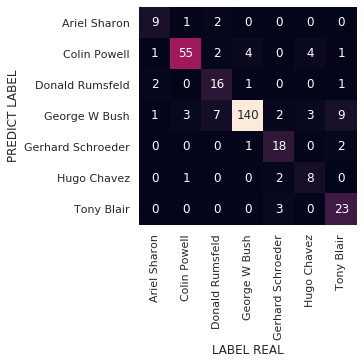

In [0]:
# martiz de confusão
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('LABEL REAL')
plt.ylabel('PREDICT LABEL');

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
#aplicando PCA
n_components = 200
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(Xtrain_minmax)
Xtrain_pca = pca.transform(Xtrain_minmax)
Xtest_pca = pca.transform(Xtest_minmax)


In [0]:
# train
clf.fit(Xtrain_pca, ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

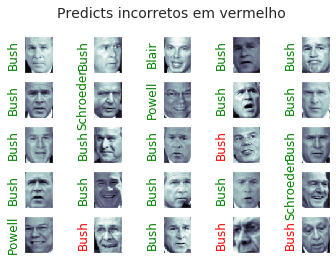

In [0]:
# predict
pred = clf.predict(Xtest_pca)
# plotando os predicts
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicts incorretos em vermelho', size=14);

In [0]:
# metricas das classes
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.31      0.47        13
     Colin Powell       0.83      0.90      0.86        60
  Donald Rumsfeld       1.00      0.52      0.68        27
    George W Bush       0.76      0.98      0.86       146
Gerhard Schroeder       1.00      0.68      0.81        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.96      0.72      0.83        36

         accuracy                           0.82       322
        macro avg       0.94      0.65      0.74       322
     weighted avg       0.86      0.82      0.81       322



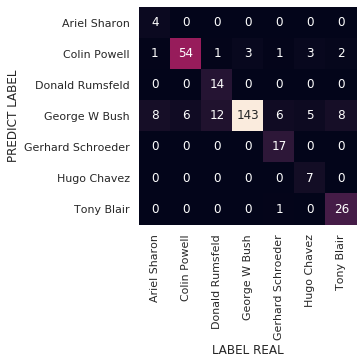

In [0]:
# matriz de confusão
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('LABEL REAL')
plt.ylabel('PREDICT LABEL');

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# definindo os hyperparametros
param_grid = {
    'C': [1, 5, 10, 15, 20],
    'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]
}

#clf_grid = GridSearchCV(
#    SVC(kernel='rbf', class_weight='balanced'), params_grid
#)

clf = SVC(kernel='rbf', class_weight='balanced', decision_function_shape='ovo')

In [0]:
# aplicando train com validacao cruzada
clf_cv = RandomizedSearchCV(clf, param_grid, iid=True, n_iter=1000, scoring='f1_micro', refit=True)
clf_cv.fit(Xtrain_pca, ytrain)
score_train = clf_cv.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=1000. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


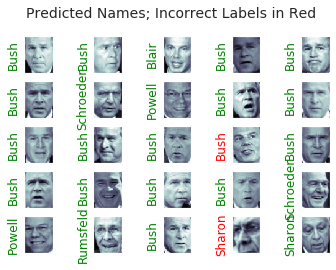

In [0]:
# predict
pred_svm = clf_cv.predict(Xtest_pca)
score_test = precision_score(pred_svm, ytest, average='micro')
# plotando os predicts
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred_svm[i]].split()[-1], color='green' if pred_svm[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
# metricas das classes
print(classification_report(ytest, pred_svm, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.77      0.71        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.79      0.70      0.75        27
    George W Bush       0.94      0.89      0.91       146
Gerhard Schroeder       0.67      0.88      0.76        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.85      0.81      0.83        36

         accuracy                           0.84       322
        macro avg       0.79      0.79      0.78       322
     weighted avg       0.85      0.84      0.85       322



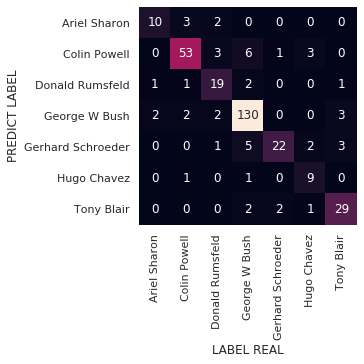

In [0]:
# matriz de confusão
matriz = confusion_matrix(ytest, pred_svm)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('LABEL REAL')
plt.ylabel('PREDICT LABEL');

#### 3.5) Qual método escolhido?

Decision Tree Classifier (RandomForestClassifier)

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Definindo o classificador
clf = RandomForestClassifier(max_features=faces.data.shape[1], criterion='entropy', class_weight='balanced', n_jobs=-1)

In [0]:
# train
clf.fit(Xtrain_minmax, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=2914,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

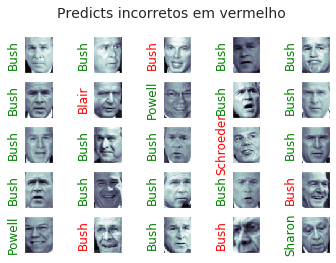

In [0]:
# predicit
pred = clf.predict(Xtest_minmax)
# plotando os predicts
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicts incorretos em vermelho', size=14);

In [0]:
# metricas das classes
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.46      0.63        13
     Colin Powell       0.75      0.73      0.74        60
  Donald Rumsfeld       0.91      0.37      0.53        27
    George W Bush       0.67      0.92      0.78       146
Gerhard Schroeder       0.64      0.36      0.46        25
      Hugo Chavez       0.53      0.67      0.59        15
       Tony Blair       0.71      0.28      0.40        36

         accuracy                           0.69       322
        macro avg       0.74      0.54      0.59       322
     weighted avg       0.72      0.69      0.67       322



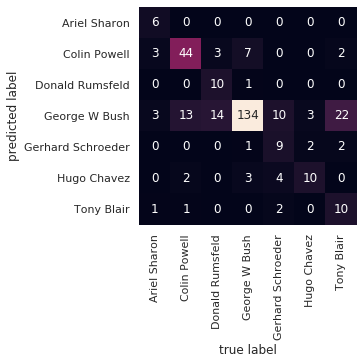

In [0]:
# matriz de confusão
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# definindo classificador
clf = RandomForestClassifier(max_features=Xtrain_pca.shape[1], criterion='entropy', class_weight='balanced', n_jobs=-1)

In [0]:
# train
clf.fit(Xtrain_pca, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=200,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

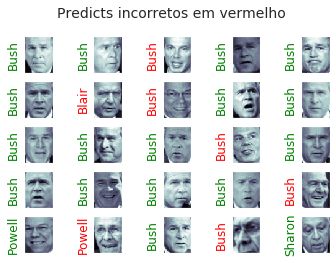

In [0]:
# predict
pred = clf.predict(Xtest_pca)
# plotando os predicts
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicts incorretos em vermelho', size=14);

In [0]:
# metricas das classes
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.23      0.38        13
     Colin Powell       0.74      0.52      0.61        60
  Donald Rumsfeld       0.89      0.30      0.44        27
    George W Bush       0.54      0.97      0.70       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.60      0.20      0.30        15
       Tony Blair       0.75      0.08      0.15        36

         accuracy                           0.59       322
        macro avg       0.65      0.33      0.37       322
     weighted avg       0.61      0.59      0.51       322



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


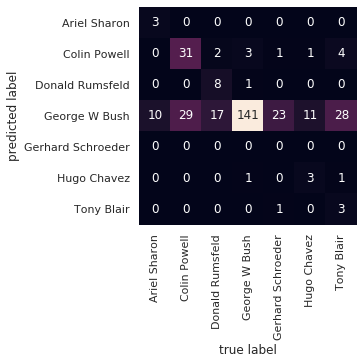

In [0]:
# matriz de confusão
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# modificando os hyperparametros e aplicando validacao cruzada
param_grid = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth' : [1, 2, 3, 4, 5]
}
clf = RandomForestClassifier(max_features=Xtrain_pca.shape[1], criterion='entropy', class_weight='balanced', n_jobs=-1)

In [0]:
clf_cv = RandomizedSearchCV(clf, param_grid, iid=True, n_iter=1000, scoring='f1_micro', refit=True)
clf_cv.fit(Xtrain_pca, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=1000. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


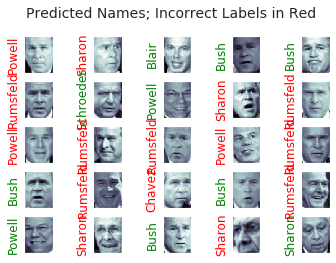

In [0]:
# predict
pred_rtc = clf_cv.predict(Xtest_pca)
# plotando os predicts
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred_rtc[i]].split()[-1], color='green' if pred_rtc[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
# metricas das classes
print(classification_report(ytest, pred_rtc, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.19      0.69      0.30        13
     Colin Powell       0.46      0.60      0.52        60
  Donald Rumsfeld       0.17      0.44      0.24        27
    George W Bush       0.71      0.23      0.35       146
Gerhard Schroeder       0.43      0.24      0.31        25
      Hugo Chavez       0.44      0.53      0.48        15
       Tony Blair       0.40      0.47      0.43        36

         accuracy                           0.38       322
        macro avg       0.40      0.46      0.38       322
     weighted avg       0.53      0.38      0.38       322



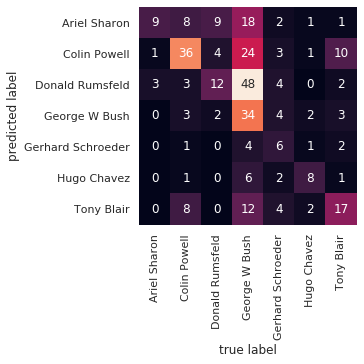

In [0]:
# matriz de confusão
matriz = confusion_matrix(ytest, pred_rtc)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

Para esse projeto foi utilizado dois modeldos classificadores (SVM e Random Forest) nas análises aplicadas eles apresentaram os seguintes resultados:

In [0]:
# SVM
print(classification_report(ytest, pred_svm, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.77      0.71        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.79      0.70      0.75        27
    George W Bush       0.94      0.89      0.91       146
Gerhard Schroeder       0.67      0.88      0.76        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.85      0.81      0.83        36

         accuracy                           0.84       322
        macro avg       0.79      0.79      0.78       322
     weighted avg       0.85      0.84      0.85       322



In [0]:
# Random Forest
print(classification_report(ytest, pred_rtc, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.19      0.69      0.30        13
     Colin Powell       0.46      0.60      0.52        60
  Donald Rumsfeld       0.17      0.44      0.24        27
    George W Bush       0.71      0.23      0.35       146
Gerhard Schroeder       0.43      0.24      0.31        25
      Hugo Chavez       0.44      0.53      0.48        15
       Tony Blair       0.40      0.47      0.43        36

         accuracy                           0.38       322
        macro avg       0.40      0.46      0.38       322
     weighted avg       0.53      0.38      0.38       322



A métrica selecionada para o desenvolvimento do trabalho foi f1-score, com base nela o modelo selecionado seria o SVM já que o mesmo possuí valores mais satisfatórios, porém colocar em produção pode haver riscos com as novas imagens diminua a performance do classificador pois os dados podem ser muito distintos dos que treinaram o modelo. Para melhorias pode ser feito mais tratamento nos dados fornecidos, como  aplicar outras técnicas de normalizacao dos dados e até o uso de uma base de imagens maior e com melhor variedade de targets.